In [ ]:


# Load the dataset
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
data = pd.read_excel('/content/drive/MyDrive/python/Ali New Spreadsheet.xlsx')

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



ModuleNotFoundError: No module named 'google.colab'

#Functions

In [ ]:
#display feature importance for random forest or any model
#that has a built in fetaure importance
def featuer_imp(model,columns_name):
  importances = model.feature_importances_
  feature_names = columns_name  # Assuming your DataFrame is named 'df'
  feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}) # Use feature_names

  # Sort the DataFrame by importance in descending order
  feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

  # Plot the feature importances
  plt.figure(figsize=(10, 6))
  sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
  plt.title('Feature Importances')
  plt.xlabel('Importance')
  plt.ylabel('Feature')
  plt.show()

In [ ]:
# plotting Confusion matrix
def matrix_con(y_test, y_pre):
  conf_matrix = confusion_matrix(y_test, y_pre)

  # Plotting the confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', \
            xticklabels=['class1', 'class2','class3'], yticklabels=['class1', 'class2','class3'])
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.show()

In [ ]:
# definition of feature permutation in a deep learning model.
# which of the features have more importance on the output
def score_squential_cat(model1,X1,Y1,Columns1):
  y_pred_dl = model1.predict(X1)
  # Predict using Deep Learning Model
  #revese the softmax and categorical
  y_lable = np.zeros(y_pred_dl.shape[0])
  for i in range(y_pred_dl.shape[0]):
    y_lable[i] = np.argmax(y_pred_dl[i])
  #
  y_test_leb = np.zeros(y_pred_dl.shape[0])
  for i in range(y_pred_dl.shape[0]):
    y_test_leb[i] = np.argmax(Y1[i])-1

#scoring function that takes the scores how the feature how important.
  def custom_scoring_function(estimator, X, y):
    y_pred = estimator.predict(X)
    #revese the softmax and categorical
    y_lable = np.zeros(y_pred.shape[0])
    for i in range(y_pred.shape[0]):
        y_lable[i] = np.argmax(y_pred[i])
    return accuracy_score(y, y_lable) # Use accuracy_score

  # Permutation importance using the custom scoring function
  result = permutation_importance(model1, X1, y_test_leb,  # Use y_test_leb instead of y_pred_dl
                                scoring=custom_scoring_function, # Pass the custom scoring function
                                n_repeats=10, random_state=42,n_jobs=-1)


  # Display feature importance
  for i in range(X1.shape[1]):
    print(f"{Columns1[i]} : {result.importances_mean[i]:.4f}")

In [ ]:
#data loanding  and processing for Laser columns
def data_load(Columns_1,drop=False,scale=True):
  data = pd.read_excel('/content/drive/MyDrive/python/Ali New Spreadsheet.xlsx')
  X = data.copy()
  if drop==True:
    X=X.dropna()
  y = X['T']  # Target variable (rock age classes)
  X = X[Columns_1]
  X1 = pd.DataFrame(X, columns=Columns_1)

  X1 = pd.DataFrame(X, columns=Columns_1)

  colm = X.select_dtypes(include=['O']).columns

#managment of > and < we remove them.
  for col in colm:
    X1[col] = X1[col].apply(lambda x: x[1:] if isinstance(x, str) and x.startswith('<') else x)
    X1[col] = X1[col].apply(lambda x: x[1:] if isinstance(x, str) and x.startswith('>') else x)

    X1[col] = pd.to_numeric(X1[col], errors='coerce').astype('float')
  colm = X1.select_dtypes(include=['O']).columns
  print(colm)
#scaler
  if scale==True:
    X1 = scaler.fit_transform(X1)
  X1 = pd.DataFrame(X1, columns=Columns_1)
  return X1,y

#Checking our dataset

In [ ]:
# Step 1: Load dataset
# Define EMPA and Laser columns
empa_columns = ['CaO', 'SiO2', 'Cr2O3', 'Na2O', 'TiO2', 'MnO', 'MgO', 'FeO', 'Al2O3', 'K2O', 'Mg#']
laser_columns = ['Li', 'Be', 'B', 'Mg', 'Si', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Co', 'Ni', 'Cu', 'Rb',
                 'Sr', 'Y', 'Zr', 'Nb', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy',
                 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'Pb', 'Th', 'U']

# Normalize EMPA and Laser Ablation columns
scaler = StandardScaler()


In [ ]:
#managing missing values...
missing_columns = data.columns[data.isnull().any()]
print(missing_columns)

Index(['Li', 'Be', 'B', 'Mg', 'Si', 'Ca', 'Ca.1', 'Sc', 'Ti', 'V', 'Cr', 'Mn',
       'Co', 'Ni', 'Cu', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Cs', 'Ba', 'La', 'Ce',
       'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu',
       'Hf', 'Ta', 'Pb', 'Th', 'U'],
      dtype='object')


In [ ]:
#find the columns with string in the information instedd of flaot we turn them into flaot

#Assuming 'colm' represents the columns you want to convert to numeric
colm = data.select_dtypes(include=['O']).columns
#colm[2:]
print(colm[2:])
# Iterate over the columns in 'colm' and apply pd.to_numeric
for col in colm[2:]:
    data[col] = pd.to_numeric(data[col], errors='coerce')



Index(['Cr2O3', 'Li', 'Be', 'B', 'Cr', 'Ni', 'Cu', 'Rb', 'Cs', 'Ba', 'Pb'], dtype='object')


In [ ]:

missing_columns = data.columns[data.isnull().any()]
print(missing_columns)
print(data['B'].isnull().sum())
print(data['Li'].isnull().sum())

Index(['Cr2O3', 'Li', 'Be', 'B', 'Mg', 'Si', 'Ca', 'Ca.1', 'Sc', 'Ti', 'V',
       'Cr', 'Mn', 'Co', 'Ni', 'Cu', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Cs', 'Ba',
       'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm',
       'Yb', 'Lu', 'Hf', 'Ta', 'Pb', 'Th', 'U'],
      dtype='object')
647
467


In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame and 'column_name' is the column you're interested in.
null_rows = data[data['SAMPLE'].isnull()]

# Display the rows with null values
print(null_rows)

Empty DataFrame
Columns: [SAMPLE, Lab, CaO, SiO2, Cr2O3, Na2O, TiO2, MnO, MgO, FeO, Al2O3, K2O, Mg#, Li, Be, B, Mg, Si, Ca, Ca.1, Sc, Ti, V, Cr, Mn, Co, Ni, Cu, Rb, Sr, Y, Zr, Nb, Cs, Ba, La, Ce, Pr, Nd, Sm, Eu, Gd, Tb, Dy, Ho, Er, Tm, Yb, Lu, Hf, Ta, Pb, Th, U, C, M, R, T]
Index: []

[0 rows x 58 columns]


#EMPA model



In [ ]:
# Step 4: Prepare Data for Classification
Columns_1 = empa_columns

X, y = data_load(Columns_1,True)

#train-test-splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Index([], dtype='object')


##Model1 - Random forest

In [ ]:
# Step 6: Random Forest Classifier with Hyperparameter Tuning
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(
    estimator=rf_model, param_grid=rf_param_grid,
    cv=5, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)

# Best Random Forest model
best_rf_model = rf_grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


Random Forest Classifier Accuracy: 0.8421
              precision    recall  f1-score   support

           1       0.93      0.87      0.90        15
           2       0.75      0.82      0.78        11
           3       0.83      0.83      0.83        12

    accuracy                           0.84        38
   macro avg       0.84      0.84      0.84        38
weighted avg       0.85      0.84      0.84        38



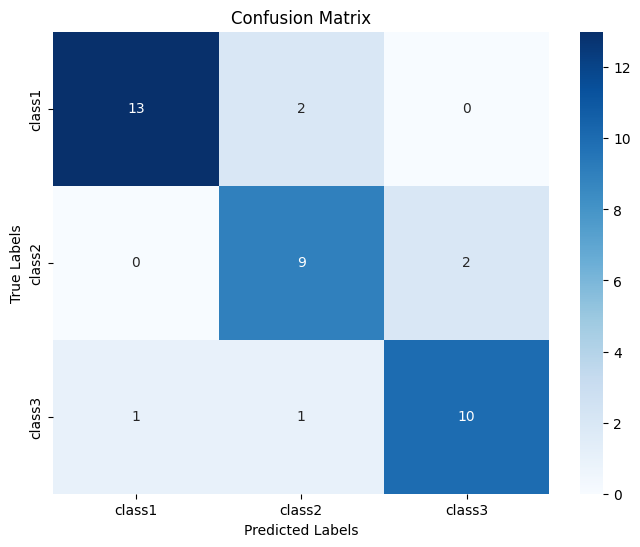

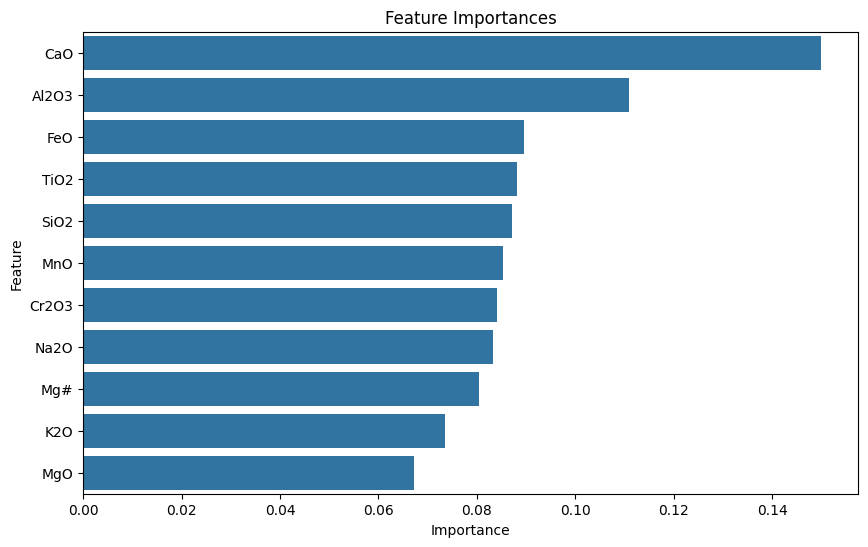

In [ ]:
# Evaluate the Random Forest Model
y_pred_rf = best_rf_model.predict(X_test)
print(f"Random Forest Classifier Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))
# Assuming y_test and y_pred are already defined as 1D arrays or Series
matrix_con(y_test, y_pred_rf)
featuer_imp(best_rf_model,Columns_1)

##model 2 - XGB

In [ ]:
# Step 7: XGBoost Classifier with Hyperparameter Tuning
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 1.0]
}
# Before fitting the XGBoost model
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder on the target variable and transform it
y_train1 = label_encoder.fit_transform(y_train)
y_test1 = label_encoder.transform(y_test)


xgb_model = XGBClassifier(random_state=42)
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, n_jobs=-1, verbose=1)
xgb_grid_search.fit(X_train, y_train1)

# Best XGBoost model
best_xgb_model = xgb_grid_search.best_estimator_
# Evaluate the XGBoost Model

Fitting 5 folds for each of 54 candidates, totalling 270 fits


XGBoost Classifier Accuracy: 0.7632
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        15
           1       0.62      0.73      0.67        11
           2       0.90      0.75      0.82        12

    accuracy                           0.76        38
   macro avg       0.77      0.76      0.76        38
weighted avg       0.78      0.76      0.77        38



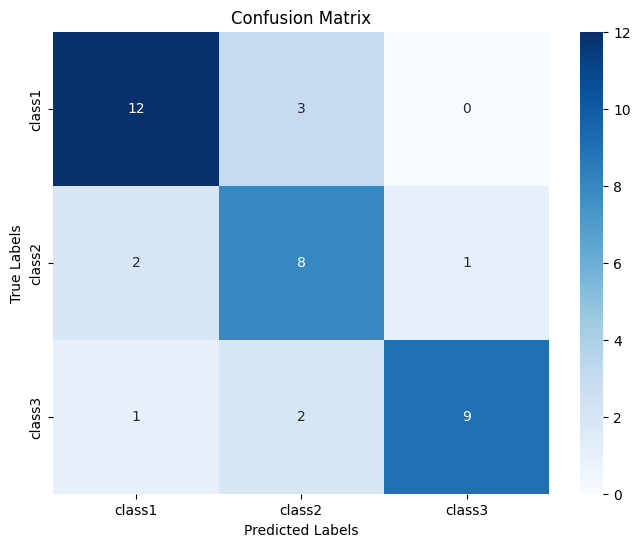

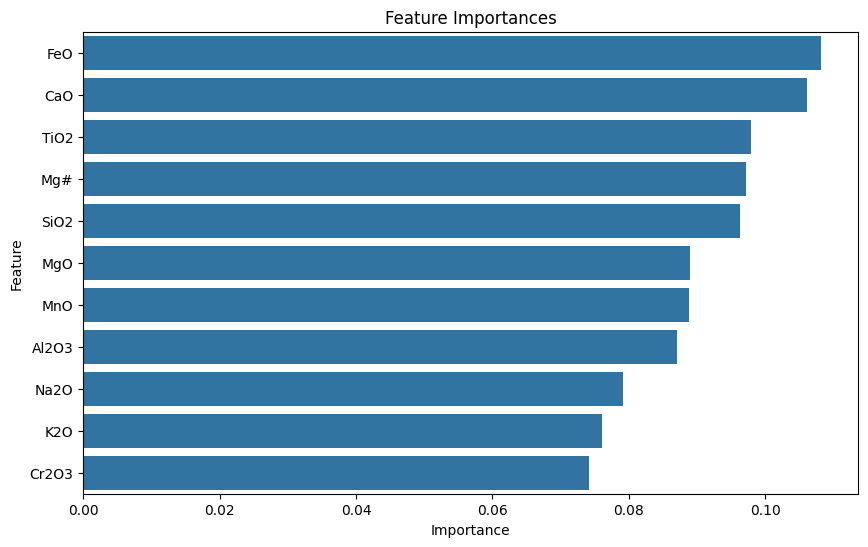

In [ ]:
# evaluating best performing xsg

y_pred_xgb = best_xgb_model.predict(X_test)
print(f"XGBoost Classifier Accuracy: {accuracy_score(y_test1, y_pred_xgb):.4f}")
#print("\nClassification Report (XGBoost):")
print(classification_report(y_test1, y_pred_xgb))

matrix_con(y_test1, y_pred_xgb)

featuer_imp(best_xgb_model,Columns_1)

##Model 3 - Deep learning

In [ ]:
# Before fitting the model, one-hot encode y_train and y_test
from tensorflow.keras.utils import to_categorical
X , y = data_load(Columns_1,True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train2 = to_categorical(y_train)
y_test2 = to_categorical(y_test)
# y_train2[:,1:].shape

# Step 8: Deep Learning Classifier
dl_model = Sequential([
    Dense(512, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the deep learning model with categorical cross-entropy loss and accuracy metric
dl_model.compile(optimizer=Adam(learning_rate=0.0001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
history = dl_model.fit(X_train, y_train2[:,1:],
                       epochs=50, batch_size=32, validation_split=0.2, verbose=0)

Index([], dtype='object')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Deep Learning Classifier Accuracy: 0.5789
              precision    recall  f1-score   support

         0.0       0.50      0.67      0.57        15
         1.0       0.62      0.45      0.53        11
         2.0       0.70      0.58      0.64        12

    accuracy                           0.58        38
   macro avg       0.61      0.57      0.58        38
weighted avg       0.60      0.58      0.58        38



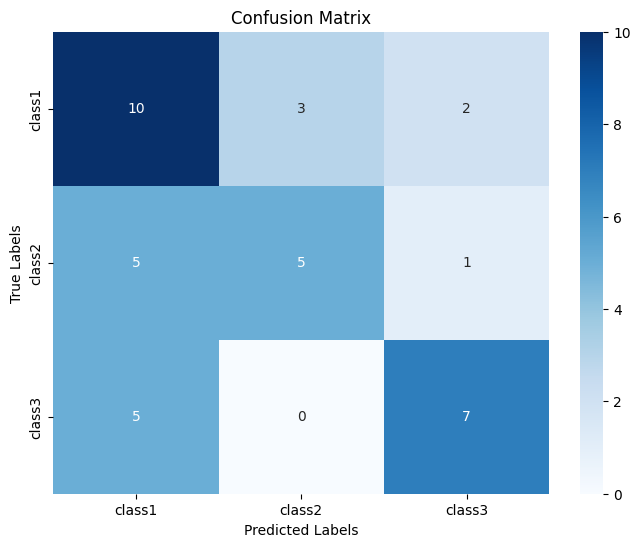

In [ ]:
y_pred_dl = dl_model.predict(X_test)
# Predict using Deep Learning Model
#revese the softmax and categorical
y_lable = np.zeros(y_pred_dl.shape[0])
for i in range(y_pred_dl.shape[0]):
  y_lable[i] = np.argmax(y_pred_dl[i])
#
y_test_leb = np.zeros(y_pred_dl.shape[0])
for i in range(y_pred_dl.shape[0]):
  y_test_leb[i] = np.argmax(y_test2[i])-1


# Step 10: Evaluate the Deep Learning Model
dl_accuracy = dl_model.evaluate(X_test, y_test2[:,1:], verbose=0)[1]
print(f"Deep Learning Classifier Accuracy: {dl_accuracy:.4f}")

print(classification_report(y_test_leb, y_lable))

matrix_con(y_test_leb, y_lable)

In [ ]:
#feature permuation score
score_squential_cat(dl_model,X_test,y_test2,Columns_1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
CaO : -0.0079
SiO2 : -0.0395
Cr2O3 : -0.0211
Na2O : -0.0079
TiO2 : 0.0079
MnO : -0.0658
MgO : -0.0974
FeO : -0.1237
Al2O3 : -0.0447
K2O : 0.0553
Mg# : -0.1184


In [ ]:
# the structure for model4 is the same of model3:

##model4

In [ ]:
X , y = data_load(Columns_1,True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Step 8: Deep Learning Classifier
dl_model = Sequential([
    Dense(512, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the deep learning model with categorical cross-entropy loss and accuracy metric
dl_model.compile(optimizer=Adam(learning_rate=0.0001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
history = dl_model.fit(X_train, y_train2[:,1:],
                       epochs=100, batch_size=32, validation_split=0.2, verbose=0)


Index([], dtype='object')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Deep Learning Classifier Accuracy: 0.7632
              precision    recall  f1-score   support

         0.0       0.71      0.80      0.75        15
         1.0       0.89      0.73      0.80        11
         2.0       0.75      0.75      0.75        12

    accuracy                           0.76        38
   macro avg       0.78      0.76      0.77        38
weighted avg       0.77      0.76      0.76        38



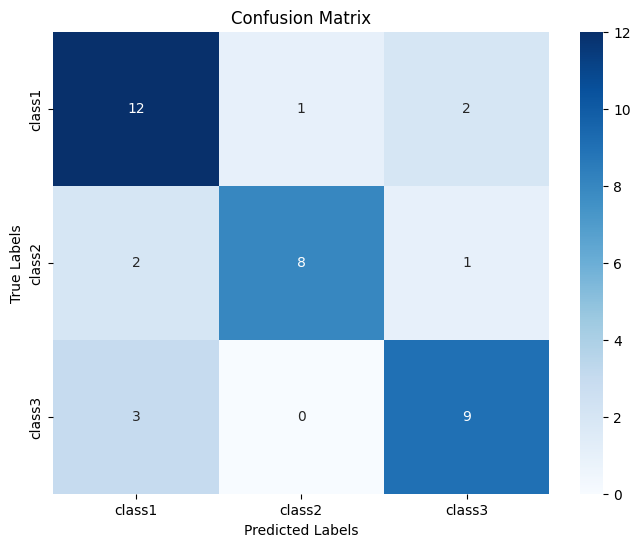

In [ ]:


y_pred_dl = dl_model.predict(X_test)
# Predict using Deep Learning Model
#revese the softmax and categorical
y_lable = np.zeros(y_pred_dl.shape[0])
for i in range(y_pred_dl.shape[0]):
  y_lable[i] = np.argmax(y_pred_dl[i])
#
y_test_leb = np.zeros(y_pred_dl.shape[0])
for i in range(y_pred_dl.shape[0]):
  y_test_leb[i] = np.argmax(y_test2[i])-1


# Step 10: Evaluate the Deep Learning Model
dl_accuracy = dl_model.evaluate(X_test, y_test2[:,1:], verbose=0)[1]
print(f"Deep Learning Classifier Accuracy: {dl_accuracy:.4f}")

print(classification_report(y_test_leb, y_lable))

matrix_con(y_test_leb, y_lable)

#featuer_imp(dl_model,empa_columns)
# Predict on the validation set
# Define a custom scoring function using accuracy_score


In [ ]:
score_squential_cat(dl_model,X_test,y_test2,Columns_1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
CaO : 0.1737
SiO2 : 0.1105
Cr2O3 : 0.0132
Na2O : 0.0789
TiO2 : 0.1316
MnO : 0.0789
MgO : 0.0500
FeO : -0.0316
Al2O3 : 0.0316
K2O : 0.0789
Mg# : -0.0421


In [ ]:
# Same process has been followed for the following section (Laser) and the EMPA+Laser comumn section.
# NOt necessary to comment furthermore.


#LASER Model



In [ ]:
# Step 4: Prepare Data for Classification
Columns_1 = laser_columns

X, y = data_load(Columns_1,True)

# print(X.isnull().sum())  # Print the sum of null values for each column to check for NaNs
# print(X[Columns_1[0]])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Index([], dtype='object')


##Model1 - Random forest

In [ ]:
# Step 6: Random Forest Classifier with Hyperparameter Tuning
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(
    estimator=rf_model, param_grid=rf_param_grid,
    cv=5, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)

# Best Random Forest model
best_rf_model = rf_grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


Random Forest Classifier Accuracy: 0.7895
              precision    recall  f1-score   support

           1       0.82      0.60      0.69        15
           2       0.73      1.00      0.85        11
           3       0.83      0.83      0.83        12

    accuracy                           0.79        38
   macro avg       0.79      0.81      0.79        38
weighted avg       0.80      0.79      0.78        38



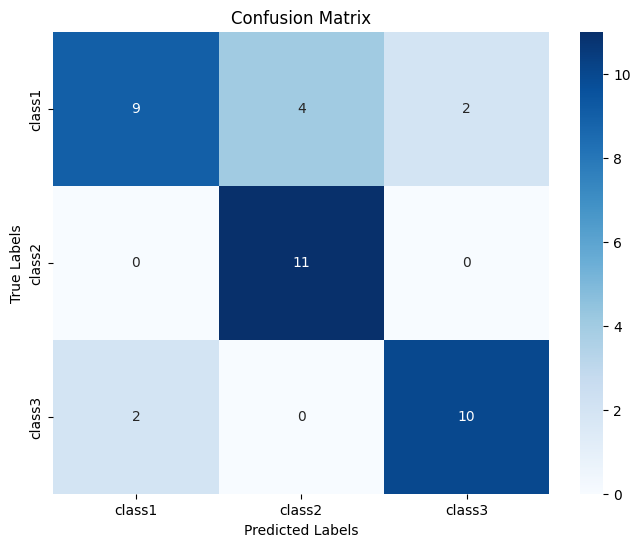

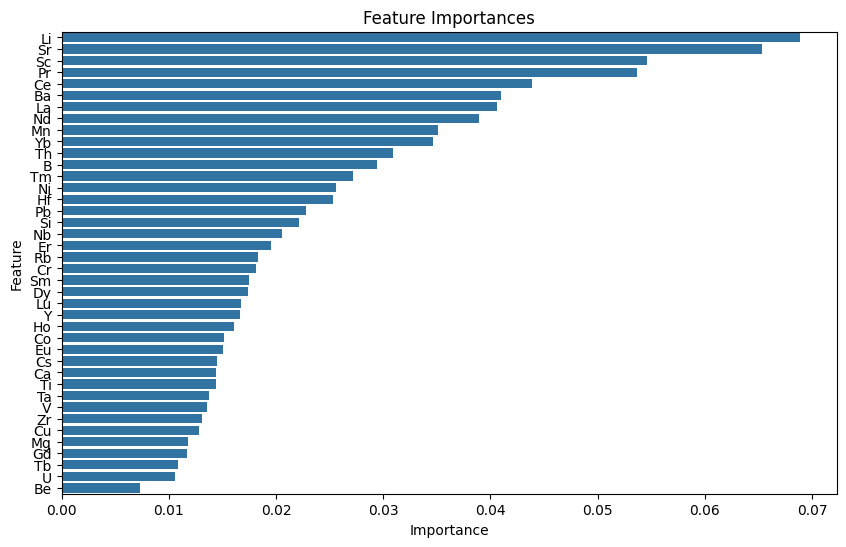

In [ ]:
# Evaluate the Random Forest Model
y_pred_rf = best_rf_model.predict(X_test)
print(f"Random Forest Classifier Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
#print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))
# Assuming y_test and y_pred are already defined as 1D arrays or Series
matrix_con(y_test, y_pred_rf)
featuer_imp(best_rf_model,Columns_1)

##model 2 - XGB

In [ ]:
# Step 7: XGBoost Classifier with Hyperparameter Tuning
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 1.0]
}
# Before fitting the XGBoost model
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder on the target variable and transform it
y_train1 = label_encoder.fit_transform(y_train)
y_test1 = label_encoder.transform(y_test)

####################

xgb_model = XGBClassifier(random_state=42)
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, n_jobs=-1, verbose=1)
xgb_grid_search.fit(X_train, y_train1)

# Best XGBoost model
best_xgb_model = xgb_grid_search.best_estimator_
# Evaluate the XGBoost Model

Fitting 5 folds for each of 54 candidates, totalling 270 fits


XGBoost Classifier Accuracy: 0.7895
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.79      1.00      0.88        11
           2       0.80      0.67      0.73        12

    accuracy                           0.79        38
   macro avg       0.79      0.80      0.79        38
weighted avg       0.79      0.79      0.78        38



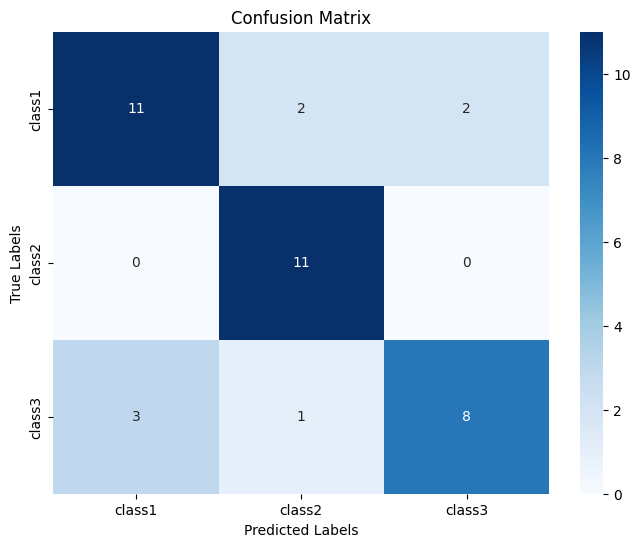

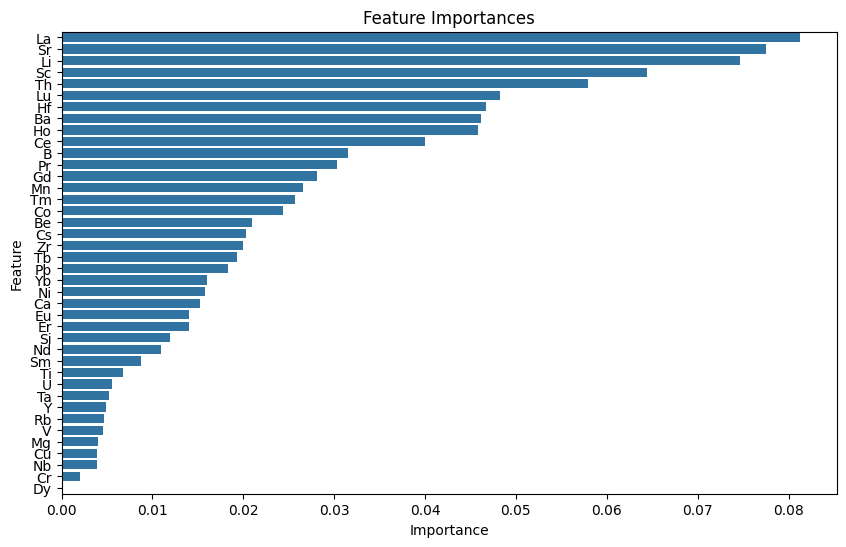

In [ ]:
y_pred_xgb = best_xgb_model.predict(X_test)
print(f"XGBoost Classifier Accuracy: {accuracy_score(y_test1, y_pred_xgb):.4f}")
#print("\nClassification Report (XGBoost):")
print(classification_report(y_test1, y_pred_xgb))

matrix_con(y_test1, y_pred_xgb)

featuer_imp(best_xgb_model,Columns_1)

##Model 3 - Deep learning

In [ ]:
# Before fitting the model, one-hot encode y_train and y_test
from tensorflow.keras.utils import to_categorical
X , y = data_load(Columns_1,True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train2 = to_categorical(y_train)
y_test2 = to_categorical(y_test)
# y_train2[:,1:].shape

# Step 8: Deep Learning Classifier
dl_model = Sequential([
    Dense(512, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    #Dense(len(np.unique(y_train2[1:])), activation='softmax')  # For multi-class classification
    Dense(3, activation='softmax')
])

# Compile the deep learning model with categorical cross-entropy loss and accuracy metric
dl_model.compile(optimizer=Adam(learning_rate=0.0001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
history = dl_model.fit(X_train, y_train2[:,1:],
                       epochs=50, batch_size=32, validation_split=0.2, verbose=0)

Index([], dtype='object')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Deep Learning Classifier Accuracy: 0.8158
              precision    recall  f1-score   support

         0.0       0.83      0.67      0.74        15
         1.0       0.67      0.91      0.77        11
         2.0       1.00      0.92      0.96        12

    accuracy                           0.82        38
   macro avg       0.83      0.83      0.82        38
weighted avg       0.84      0.82      0.82        38



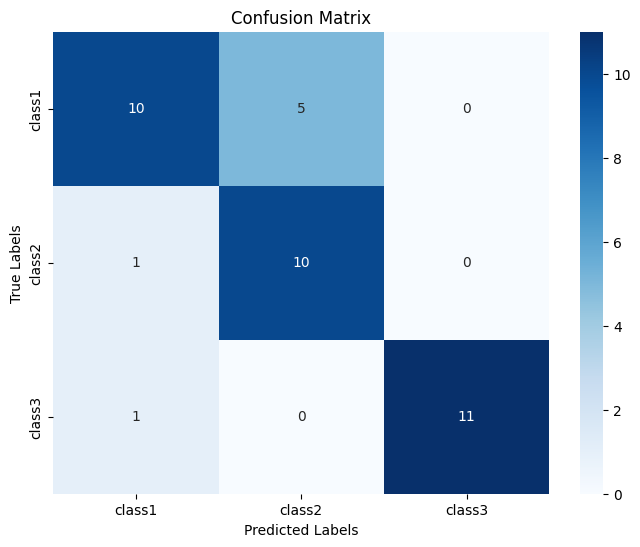

In [ ]:
y_pred_dl = dl_model.predict(X_test)
# Predict using Deep Learning Model
#revese the softmax and categorical
y_lable = np.zeros(y_pred_dl.shape[0])
for i in range(y_pred_dl.shape[0]):
  y_lable[i] = np.argmax(y_pred_dl[i])
#
y_test_leb = np.zeros(y_pred_dl.shape[0])
for i in range(y_pred_dl.shape[0]):
  y_test_leb[i] = np.argmax(y_test2[i])-1


# Step 10: Evaluate the Deep Learning Model
dl_accuracy = dl_model.evaluate(X_test, y_test2[:,1:], verbose=0)[1]
print(f"Deep Learning Classifier Accuracy: {dl_accuracy:.4f}")

print(classification_report(y_test_leb, y_lable))

matrix_con(y_test_leb, y_lable)

In [ ]:
score_squential_cat(dl_model,X_test,y_test2,Columns_1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Li : 0.0605
Be : 0.0000
B : 0.0658
Mg : 0.0000
Si : 0.0079
Ca : 0.0026
Sc : 0.0053
Ti : 0.0105
V : -0.0026
Cr : 0.0026
Mn : 0.0053
Co : 0.0105
Ni : 0.0684
Cu : 0.0000
Rb : 0.0000
Sr : 0.0026
Y : 0.0132
Zr : 0.0079
Nb : 0.0184
Cs : -0.0053
Ba : 0.0026
La : -0.0342
Ce : 0.0263
Pr : 0.0000
Nd : 0.0053
Sm : 0.0342
Eu : 0.0105
Gd : 0.0000
Tb : 0.0026
Dy : 0.0132
Ho : 0.0105
Er : 0.0368
Tm : 0.0316
Yb : 0.0053
Lu : 0.0289
Hf : 0.0105
Ta : 0.0079
Pb : 0.0211
Th : 0.0105
U : 0.0211


##model4

In [ ]:
X , y = data_load(Columns_1,True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Step 8: Deep Learning Classifier
dl_model = Sequential([
    Dense(512, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    #Dense(len(np.unique(y_train2[1:])), activation='softmax')  # For multi-class classification
    Dense(3, activation='softmax')
])

# Compile the deep learning model with categorical cross-entropy loss and accuracy metric
dl_model.compile(optimizer=Adam(learning_rate=0.0001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
history = dl_model.fit(X_train, y_train2[:,1:],
                       epochs=100, batch_size=32, validation_split=0.2, verbose=0)


Index([], dtype='object')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Deep Learning Classifier Accuracy: 0.9211
              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90        15
         1.0       0.85      1.00      0.92        11
         2.0       1.00      0.92      0.96        12

    accuracy                           0.92        38
   macro avg       0.92      0.93      0.92        38
weighted avg       0.93      0.92      0.92        38



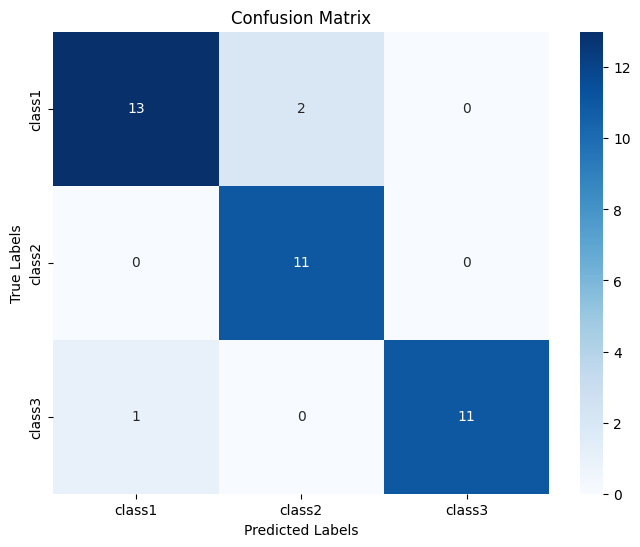

In [ ]:
###############

y_pred_dl = dl_model.predict(X_test)
# Predict using Deep Learning Model
#revese the softmax and categorical
y_lable = np.zeros(y_pred_dl.shape[0])
for i in range(y_pred_dl.shape[0]):
  y_lable[i] = np.argmax(y_pred_dl[i])
#
y_test_leb = np.zeros(y_pred_dl.shape[0])
for i in range(y_pred_dl.shape[0]):
  y_test_leb[i] = np.argmax(y_test2[i])-1


# Step 10: Evaluate the Deep Learning Model
dl_accuracy = dl_model.evaluate(X_test, y_test2[:,1:], verbose=0)[1]
print(f"Deep Learning Classifier Accuracy: {dl_accuracy:.4f}")

print(classification_report(y_test_leb, y_lable))

matrix_con(y_test_leb, y_lable)

#featuer_imp(dl_model,empa_columns)
# Predict on the validation set
# Define a custom scoring function using accuracy_score


In [ ]:
score_squential_cat(dl_model,X_test,y_test2,Columns_1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Li : 0.0474
Be : 0.0105
B : 0.0368
Mg : 0.0079
Si : 0.0026
Ca : 0.0211
Sc : 0.0079
Ti : 0.0237
V : 0.0211
Cr : 0.0000
Mn : 0.0684
Co : 0.0053
Ni : 0.0316
Cu : 0.0000
Rb : 0.0053
Sr : 0.0368
Y : 0.0263
Zr : 0.0184
Nb : 0.0026
Cs : 0.0158
Ba : 0.0026
La : 0.0132
Ce : 0.0211
Pr : 0.0237
Nd : 0.0421
Sm : 0.0263
Eu : 0.0079
Gd : 0.0026
Tb : 0.0000
Dy : 0.0184
Ho : 0.0053
Er : 0.0237
Tm : 0.0632
Yb : 0.0632
Lu : 0.0737
Hf : 0.0684
Ta : 0.0079
Pb : 0.0158
Th : 0.0184
U : 0.0079


#EMPA + LASER Model



In [ ]:
# Step 4: Prepare Data for Classification
Columns_1 = empa_columns + laser_columns

X, y = data_load(Columns_1,True)

# print(X.isnull().sum())  # Print the sum of null values for each column to check for NaNs
# print(X[Columns_1[0]])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Index([], dtype='object')


##Model1 - Random forest

In [ ]:
# Step 6: Random Forest Classifier with Hyperparameter Tuning
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(
    estimator=rf_model, param_grid=rf_param_grid,
    cv=5, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)

# Best Random Forest model
best_rf_model = rf_grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


Random Forest Classifier Accuracy: 0.8158
              precision    recall  f1-score   support

           1       0.90      0.60      0.72        15
           2       0.73      1.00      0.85        11
           3       0.85      0.92      0.88        12

    accuracy                           0.82        38
   macro avg       0.83      0.84      0.82        38
weighted avg       0.83      0.82      0.81        38



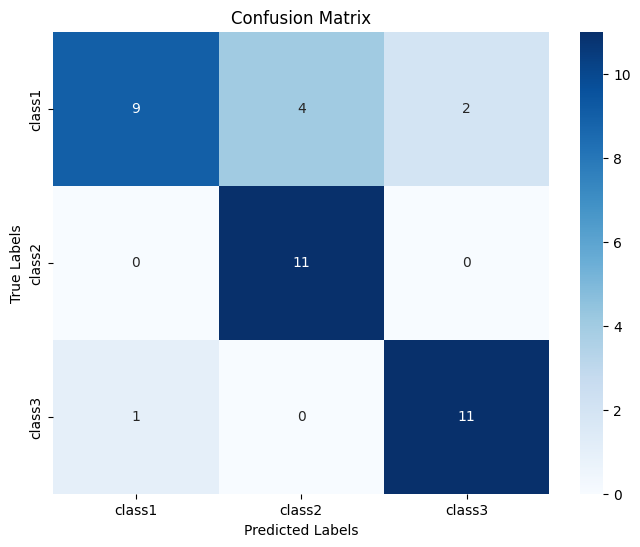

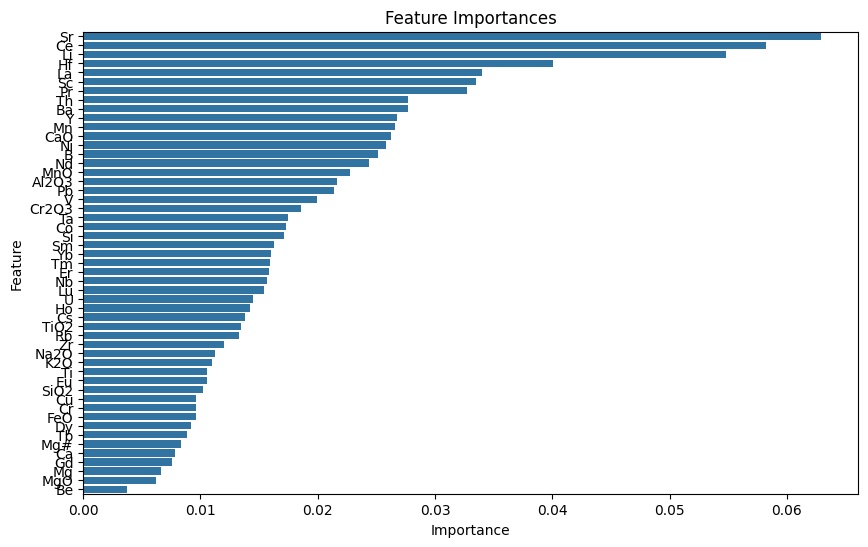

In [ ]:
# Evaluate the Random Forest Model
y_pred_rf = best_rf_model.predict(X_test)
print(f"Random Forest Classifier Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
#print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))
# Assuming y_test and y_pred are already defined as 1D arrays or Series
matrix_con(y_test, y_pred_rf)
featuer_imp(best_rf_model,Columns_1)

##model 2 - XGB

In [ ]:
# Step 7: XGBoost Classifier with Hyperparameter Tuning
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 1.0]
}
# Before fitting the XGBoost model
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder on the target variable and transform it
y_train1 = label_encoder.fit_transform(y_train)
y_test1 = label_encoder.transform(y_test)

####################

xgb_model = XGBClassifier(random_state=42)
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, n_jobs=-1, verbose=1)
xgb_grid_search.fit(X_train, y_train1)

# Best XGBoost model
best_xgb_model = xgb_grid_search.best_estimator_
# Evaluate the XGBoost Model

Fitting 5 folds for each of 54 candidates, totalling 270 fits


XGBoost Classifier Accuracy: 0.8421
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        15
           1       0.92      1.00      0.96        11
           2       0.82      0.75      0.78        12

    accuracy                           0.84        38
   macro avg       0.84      0.85      0.85        38
weighted avg       0.84      0.84      0.84        38



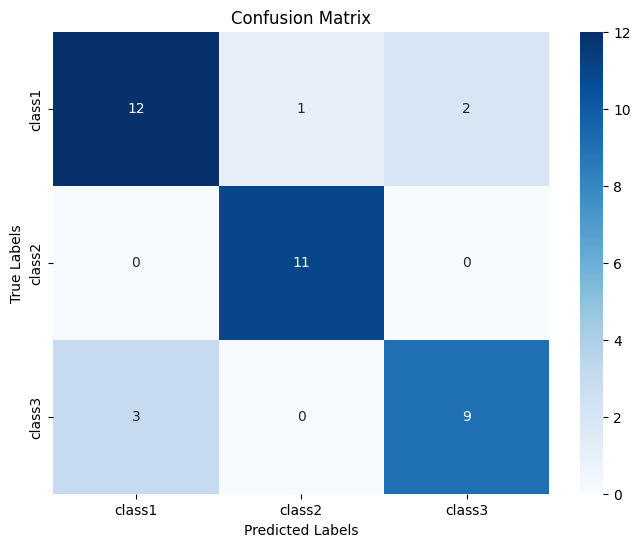

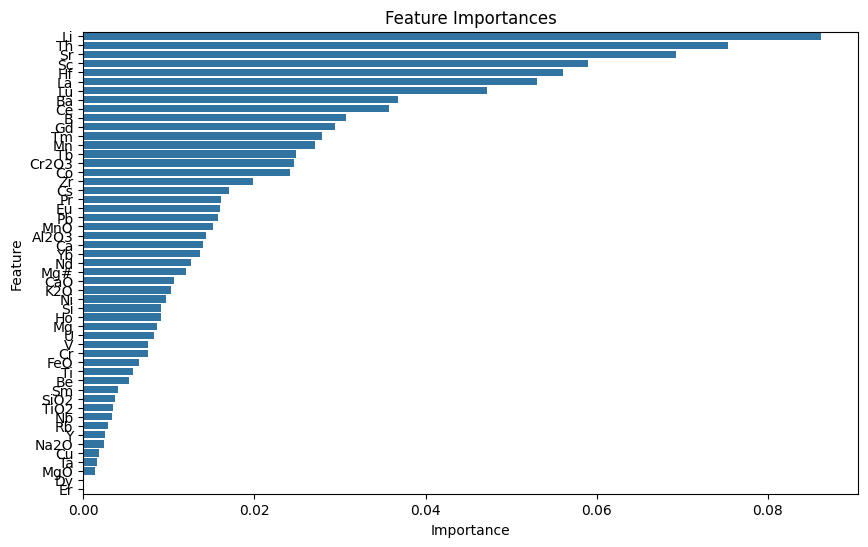

In [ ]:
y_pred_xgb = best_xgb_model.predict(X_test)
print(f"XGBoost Classifier Accuracy: {accuracy_score(y_test1, y_pred_xgb):.4f}")
#print("\nClassification Report (XGBoost):")
print(classification_report(y_test1, y_pred_xgb))

matrix_con(y_test1, y_pred_xgb)

featuer_imp(best_xgb_model,Columns_1)

##Model 3 - Deep learning

In [ ]:
# Before fitting the model, one-hot encode y_train and y_test
from tensorflow.keras.utils import to_categorical
X , y = data_load(Columns_1,True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train2 = to_categorical(y_train)
y_test2 = to_categorical(y_test)
# y_train2[:,1:].shape

# Step 8: Deep Learning Classifier
dl_model = Sequential([
    Dense(512, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    #Dense(len(np.unique(y_train2[1:])), activation='softmax')  # For multi-class classification
    Dense(3, activation='softmax')
])

# Compile the deep learning model with categorical cross-entropy loss and accuracy metric
dl_model.compile(optimizer=Adam(learning_rate=0.0001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
history = dl_model.fit(X_train, y_train2[:,1:],
                       epochs=50, batch_size=32, validation_split=0.2, verbose=0)

Index([], dtype='object')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
Deep Learning Classifier Accuracy: 0.7368
              precision    recall  f1-score   support

         0.0       0.65      0.73      0.69        15
         1.0       0.64      0.64      0.64        11
         2.0       1.00      0.83      0.91        12

    accuracy                           0.74        38
   macro avg       0.76      0.73      0.74        38
weighted avg       0.76      0.74      0.74        38



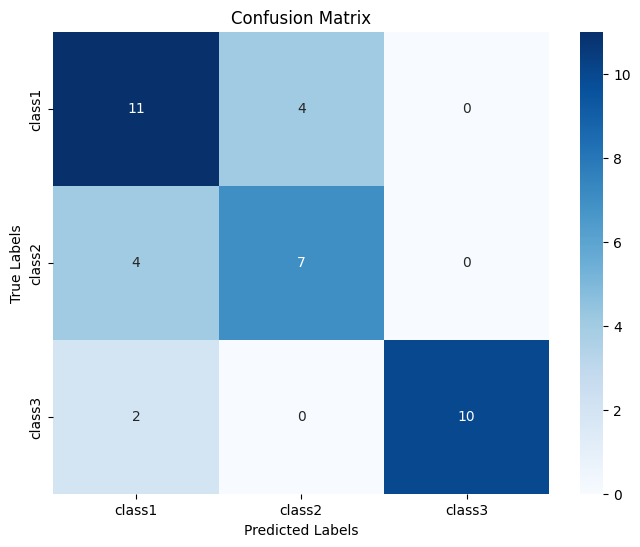

In [ ]:
y_pred_dl = dl_model.predict(X_test)
# Predict using Deep Learning Model
#revese the softmax and categorical
y_lable = np.zeros(y_pred_dl.shape[0])
for i in range(y_pred_dl.shape[0]):
  y_lable[i] = np.argmax(y_pred_dl[i])
#
y_test_leb = np.zeros(y_pred_dl.shape[0])
for i in range(y_pred_dl.shape[0]):
  y_test_leb[i] = np.argmax(y_test2[i])-1


# Step 10: Evaluate the Deep Learning Model
dl_accuracy = dl_model.evaluate(X_test, y_test2[:,1:], verbose=0)[1]
print(f"Deep Learning Classifier Accuracy: {dl_accuracy:.4f}")

print(classification_report(y_test_leb, y_lable))

matrix_con(y_test_leb, y_lable)

In [ ]:
score_squential_cat(dl_model,X_test,y_test2,Columns_1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
CaO : 0.0132
SiO2 : 0.0053
Cr2O3 : 0.0158
Na2O : 0.0105
TiO2 : 0.0184
MnO : -0.0184
MgO : 0.0158
FeO : -0.0395
Al2O3 : 0.0132
K2O : 0.0395
Mg# : -0.0421
Li : 0.0711
Be : -0.0026
B : 0.0605
Mg : 0.0132
Si : -0.0079
Ca : 0.0184
Sc : 0.0053
Ti : 0.0079
V : -0.0026
Cr : -0.0000
Mn : 0.0132
Co : -0.0237
Ni : 0.0132
Cu : 0.0158
Rb : 0.0026
Sr : -0.0026
Y : 0.0132
Zr : 0.0395
Nb : 0.0132
Cs : 0.0000
Ba : -0.0105
La : -0.0447
Ce : 0.0053
Pr : -0.0079
Nd : 0.0342
Sm : 0.0026
Eu : -0.0000
Gd : 0.0105
Tb : 0.0053
Dy : 0.0079
Ho : 0.0132
Er : 0.0079
Tm : 0.0053
Yb : -0.0000
Lu : 0.0026
Hf : 0.0158
Ta : 0.0105
Pb : 0.0079
Th : 0.0079
U : 0.0026


##model4

In [ ]:
X , y = data_load(Columns_1,True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Step 8: Deep Learning Classifier
dl_model = Sequential([
    Dense(512, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    #Dense(len(np.unique(y_train2[1:])), activation='softmax')  # For multi-class classification
    Dense(3, activation='softmax')
])

# Compile the deep learning model with categorical cross-entropy loss and accuracy metric
dl_model.compile(optimizer=Adam(learning_rate=0.0001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
history = dl_model.fit(X_train, y_train2[:,1:],
                       epochs=100, batch_size=32, validation_split=0.2, verbose=0)


Index([], dtype='object')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Deep Learning Classifier Accuracy: 0.9474
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        15
         1.0       0.92      1.00      0.96        11
         2.0       1.00      0.92      0.96        12

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



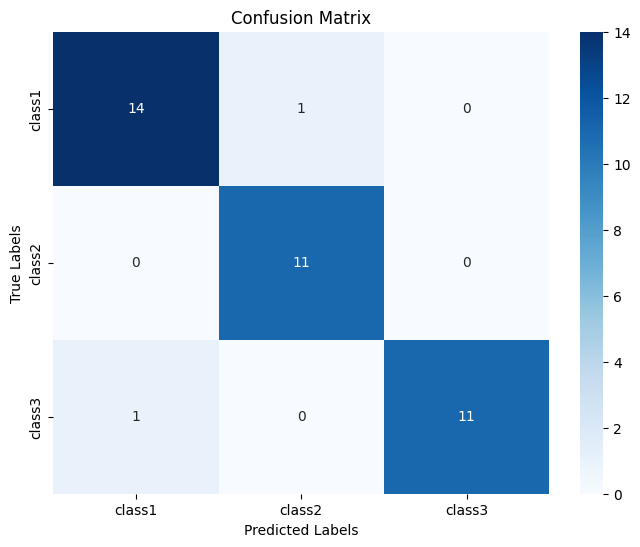

In [ ]:
###############

y_pred_dl = dl_model.predict(X_test)
# Predict using Deep Learning Model
#revese the softmax and categorical
y_lable = np.zeros(y_pred_dl.shape[0])
for i in range(y_pred_dl.shape[0]):
  y_lable[i] = np.argmax(y_pred_dl[i])
#
y_test_leb = np.zeros(y_pred_dl.shape[0])
for i in range(y_pred_dl.shape[0]):
  y_test_leb[i] = np.argmax(y_test2[i])-1


# Step 10: Evaluate the Deep Learning Model
dl_accuracy = dl_model.evaluate(X_test, y_test2[:,1:], verbose=0)[1]
print(f"Deep Learning Classifier Accuracy: {dl_accuracy:.4f}")

print(classification_report(y_test_leb, y_lable))

matrix_con(y_test_leb, y_lable)

#featuer_imp(dl_model,empa_columns)
# Predict on the validation set
# Define a custom scoring function using accuracy_score


In [ ]:
score_squential_cat(dl_model,X_test,y_test2,Columns_1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
CaO : 0.0421
SiO2 : 0.0342
Cr2O3 : 0.0000
Na2O : 0.0263
TiO2 : 0.0342
MnO : 0.0053
MgO : 0.0026
FeO : 0.0000
Al2O3 : 0.0289
K2O : -0.0000
Mg# : 0.0053
Li : 0.0500
Be : 0.0026
B : 0.0421
Mg : 0.0500
Si : 0.0158
Ca : 0.0026
Sc : 0.0421
Ti : 0.0158
V : 0.0289
Cr : 0.0000
Mn : 0.0342
Co : 0.0079
Ni : 0.0605
Cu : 0.0000
Rb : 0.0079
Sr : 0.0342
Y : 0.0053
Zr : 0.0237
Nb : 0.0053
Cs : 0.0184
Ba : 0.0053
La : 0.0105
Ce : 0.0316
Pr : 0.0289
Nd : 0.0263
Sm : 0.0158
Eu : 0.0158
Gd : 0.0158
Tb : 0.0079
Dy : 0.0263
Ho : 0.0474
Er : 0.0184
Tm : 0.0342
Yb : 0.0526
Lu : 0.0526
Hf : 0.0684
Ta : 0.0079
Pb : 0.0079
Th : 0.0289
U : 0.0105
